# Decision Trees Exersice 

### First Step : Download __[Titanic Data](https://www.kaggle.com/c/titanic/data)__  
- **NOTE** : use only  file `train.csv`from data.
#### 1. Import library of pandas and numpy

In [1]:
import pandas as pd
import numpy as np

#### 2. Load Data using Pandas

In [2]:
df = pd.read_csv('train.CSV')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. Check column in Dataset and Drop useless columns 

- **Hint** : useless columns `Name`, `Ticket`,`PassengerId` and `Cabin`

In [3]:
df.drop(['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

#### 4. Checking null values in each column and Handle with Mode

- **Hint** : 
- 1. for `Age` use Mode since there is outliers in this column
- 2. for `Embarked` use Mode since it is a categorical variable


In [4]:
df.Age.isnull().sum(),df.Embarked.isnull().sum()

(177, 2)

In [5]:
df.Age.fillna(df.Age.mode()[0],inplace=True)
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

#### 5. Handle Categorical Data using `get_Dummies()` in pandas 

- **Hint** : Handle only columns `Sex` and `Embarked`
- 
 Read this document on how to use [`get_Dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)  

In [6]:
df = pd.get_dummies(df,['Sex','Embarked'])

#### 6.  Separate  X ( features ) from  Y (labels)
**Hint** : 
- goal : predict only passengers survive and or not be

In [8]:
x = df.drop('Survived',axis=1)
y = df.iloc[:,0]

#### 7. Split data into the Training data and Test data by `random_state=5` and `test_size=0.25`

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x, y, test_size=0.25, random_state=5)

#### 8. Scale all Data using `StandardScaler` 

In [10]:
from sklearn.preprocessing import StandardScaler
sc      = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

#### 9.Building your model ( Decision Tree )
 Use the default sklearn parameters with `random_state=1`

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=1)
tree_1.fit(x_train, y_train);

In [20]:
print(f'Decision Tree has {tree.tree_.node_count} nodes with a maximum depth of {tree.tree_.max_depth}.')

print(f'Model Accuracy for train data: {tree.score(x_train, y_train)}')
print(f'Model Accuracy for test data: {tree.score(x_test, y_test)}')

Decision Tree has 61 nodes with a maximum depth of 6.
Model Accuracy for train data: 0.8712574850299402
Model Accuracy for test data: 0.8251121076233184


#### 10. Use  pruning  decision Tree to determine the best maximum depth for test data

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

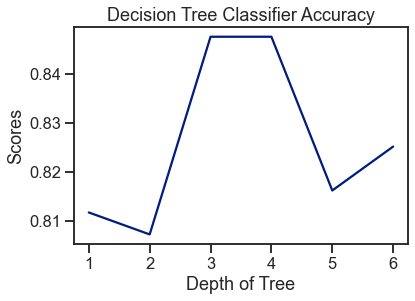

In [22]:
scores = []

for i in range(1, 7):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(x_train, y_train)
    score = tree.score(x_test, y_test)
    scores.append(score)

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('ticks')

plt.plot(range(1, 7), scores)
plt.xlabel("Depth of Tree")
plt.ylabel("Scores")
plt.title("Decision Tree Classifier Accuracy")
plt.show()

#### 12. Calculate Confusion Matrix ,precision,recall and F1-score for the Decision Tree model & Random Forest

In [23]:
y_pred = tree_1.predict(x_test)

In [24]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       140
           1       0.78      0.75      0.77        83

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



#### 13.Building your model (SVM )
 Use the default sklearn parameters with `random_state=1`

In [26]:
from sklearn.svm import SVC
clf = SVC(random_state=1)
clf.fit(x_train, y_train);

In [27]:
print(f'Model Accuracy for train data: {clf.score(x_train, y_train)}')
print(f'Model Accuracy for test data: {clf.score(x_test, y_test)}')

Model Accuracy for train data: 0.8323353293413174
Model Accuracy for test data: 0.852017937219731


#### 12. Calculate Confusion Matrix ,precision,recall and F1-score for the SVM model

In [28]:
y_pred = clf.predict(x_test)

In [29]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       140
           1       0.90      0.67      0.77        83

    accuracy                           0.85       223
   macro avg       0.87      0.82      0.83       223
weighted avg       0.86      0.85      0.85       223

